In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_stock_prices.csv to cleaned_stock_prices (1).csv


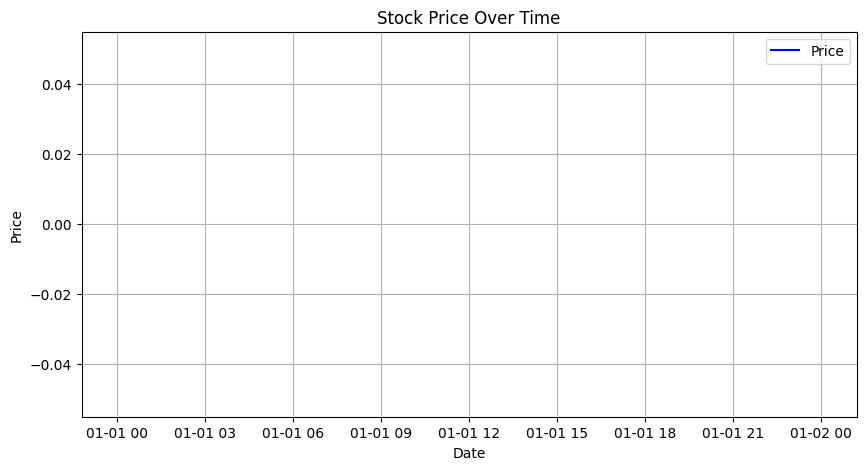

Insight 1: The line plot shows how the stock price changes over time. We can identify upward or downward trends and spot sudden price jumps or drops indicating volatility.



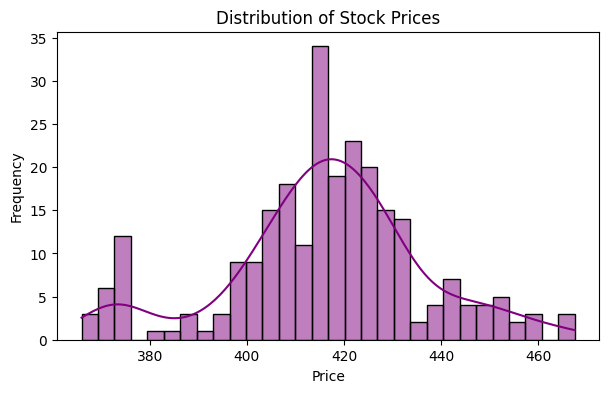

Insight 2: The histogram shows how frequently different price levels occur. A narrow peak suggests stable prices, while a wide spread indicates high volatility.



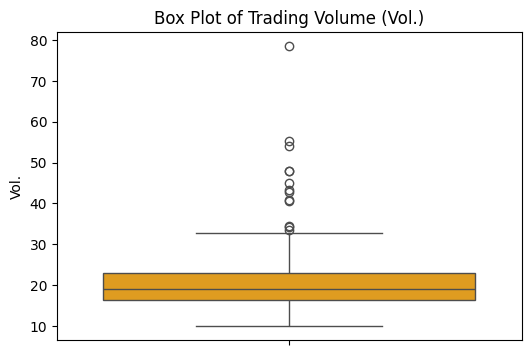

Insight 3: The box plot highlights days with extremely high or low trading volume. Outliers often correspond to news events or major market movements.



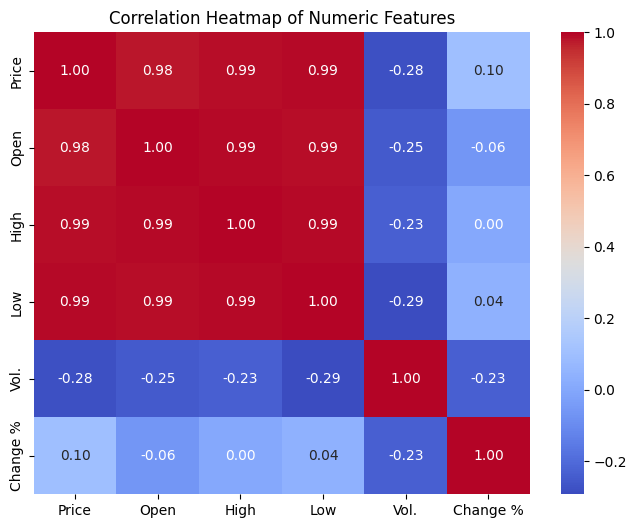

Insight 4: The heatmap reveals strong relationships among numeric variables. For example, Open, High, Low, and Price tend to be highly correlated, while Volume may show weaker correlation.



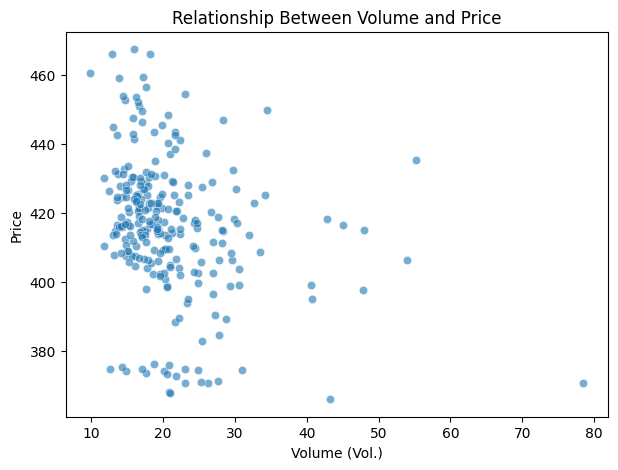

Insight 5: The scatter plot shows how trading volume relates to price. If points cluster or slope upward, higher volume may correspond to higher prices. If scattered randomly, volume has limited effect on price.

✅ Milestone Achieved: First Exploratory Data Analysis (EDA) completed successfully.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("cleaned_stock_prices.csv")
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '').str.replace('%', '')
    df[col] = df[col].str.replace('M', '')  # remove 'M' for millions
    df[col] = pd.to_numeric(df[col], errors='coerce')
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.sort_values('Date')
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Price'], color='blue', label='Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
print("Insight 1: The line plot shows how the stock price changes over time. "
      "We can identify upward or downward trends and spot sudden price jumps or drops indicating volatility.\n")
plt.figure(figsize=(7,4))
sns.histplot(df['Price'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribution of Stock Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
print("Insight 2: The histogram shows how frequently different price levels occur. "
      "A narrow peak suggests stable prices, while a wide spread indicates high volatility.\n")
if 'Vol.' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df['Vol.'].dropna(), color='orange')
    plt.title('Box Plot of Trading Volume (Vol.)')
    plt.ylabel('Vol.')
    plt.show()
    print("Insight 3: The box plot highlights days with extremely high or low trading volume. "
          "Outliers often correspond to news events or major market movements.\n")
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()
print("Insight 4: The heatmap reveals strong relationships among numeric variables. "
      "For example, Open, High, Low, and Price tend to be highly correlated, "
      "while Volume may show weaker correlation.\n")
if 'Vol.' in df.columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=df['Vol.'], y=df['Price'], data=df, alpha=0.6)
    plt.title('Relationship Between Volume and Price')
    plt.xlabel('Volume (Vol.)')
    plt.ylabel('Price')
    plt.show()
    print("Insight 5: The scatter plot shows how trading volume relates to price. "
          "If points cluster or slope upward, higher volume may correspond to higher prices. "
          "If scattered randomly, volume has limited effect on price.\n")
print("✅ Milestone Achieved: First Exploratory Data Analysis (EDA) completed successfully.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

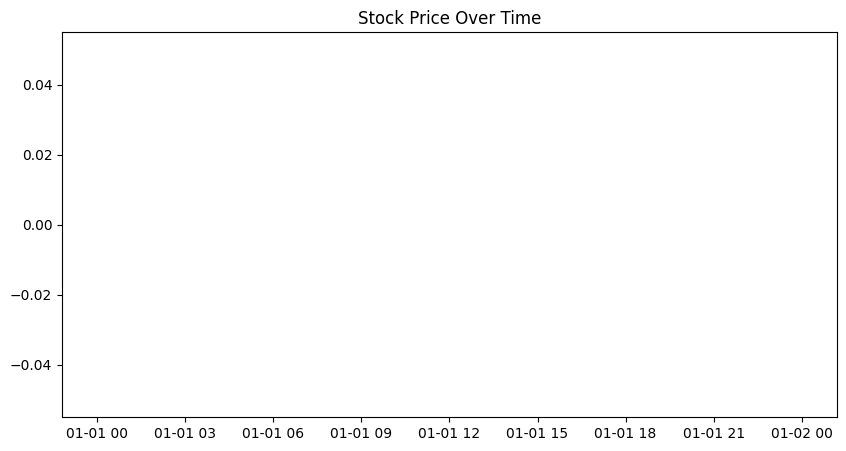

In [ ]:
import zipfile

# Create a ZIP file
with zipfile.ZipFile('EDA_outputs.zip', 'w') as zipf:
    # Save CSV
    df.to_csv("processed_stock_prices.csv", index=False)
    zipf.write("processed_stock_prices.csv")

    # Save a plot
    plt.figure(figsize=(10,5))
    plt.plot(df['Date'], df['Price'])
    plt.title('Stock Price Over Time')
    plt.savefig("stock_price_over_time.png")
    zipf.write("stock_price_over_time.png")

# Download ZIP
files.download('EDA_outputs.zip')
